# my toolkit 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# my data 

In [2]:
df=pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

In [ ]:
df.duplicated().value_counts()

# visualise the data 

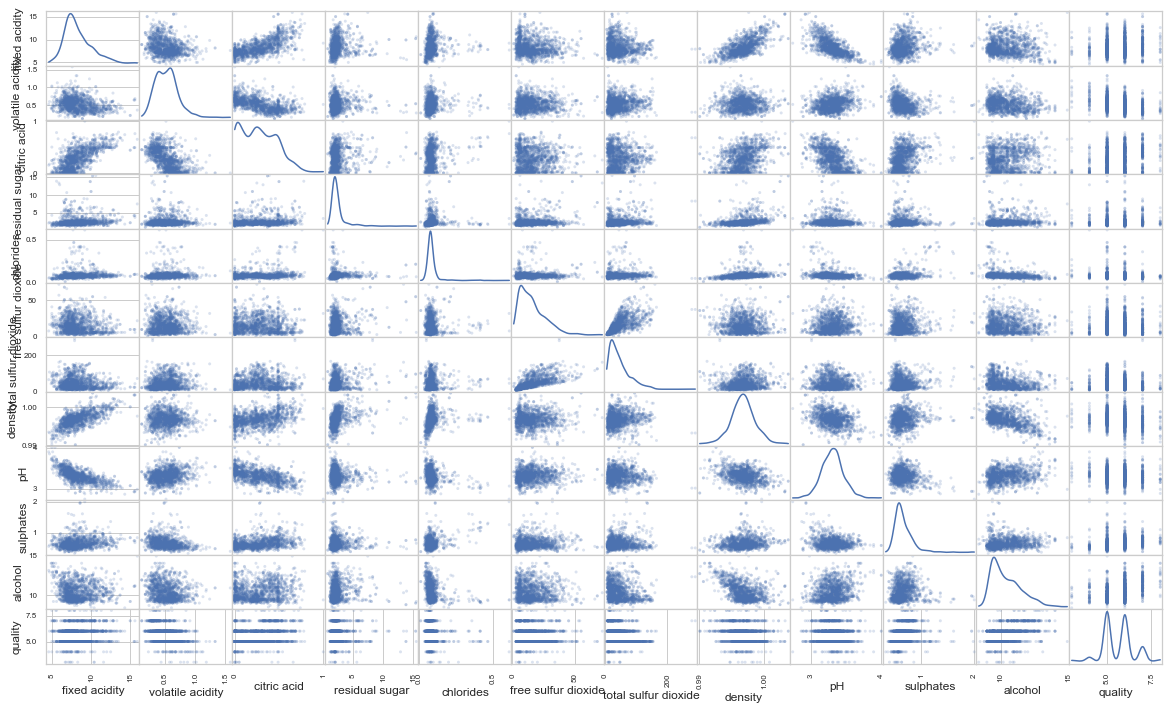

In [5]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.2, figsize=(20,12),diagonal='kde');

In [ ]:
sns.pairplot(df);

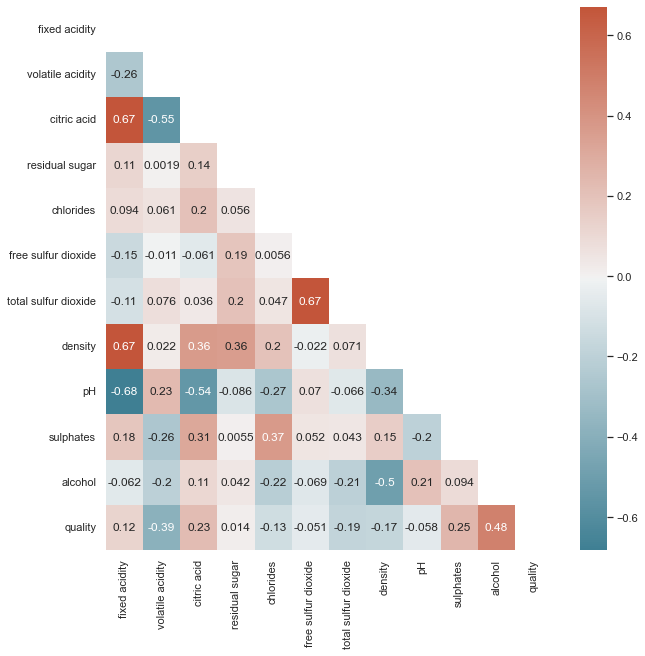

In [6]:
cm=df.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(cm, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True));

In [ ]:
# dropping one of highly fields - total sulfur diox and density
# also dropping anything less than -0.1 corr()
df_reduced=df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'],axis=1)

In [ ]:
df_reduced.columns

In [ ]:
sns.displot(df['fixed acidity']);

In [ ]:
df['fixed_acidity']=np.log(df['fixed acidity'])

In [ ]:
sns.displot(df['citric acid']);

In [ ]:
sns.displot(df['residual sugar']);

In [ ]:
# try rescaling this column using power transformations 
from scipy import stats 
residual_sugar_new, sugar_lambda = stats.boxcox(df['residual sugar'])

In [ ]:
residual_sugar_new

In [ ]:
sns.displot(residual_sugar_new,bins=20);

In [ ]:
residual_sugar_new_2= np.log(df['residual sugar']) 

In [ ]:
sns.displot(residual_sugar_new_2,bins=20);

In [ ]:
df['residual sugar']= np.log(df['residual sugar'])

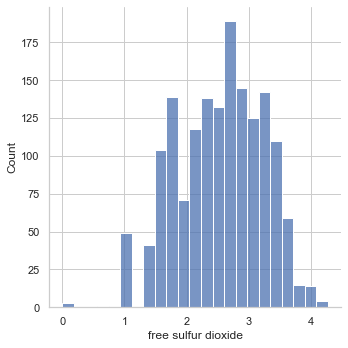

In [9]:
sns.displot(df['free sulfur dioxide']);

In [8]:
df['free sulfur dioxide']=np.log(df['free sulfur dioxide'])

In [ ]:
sns.displot(df['alcohol']);

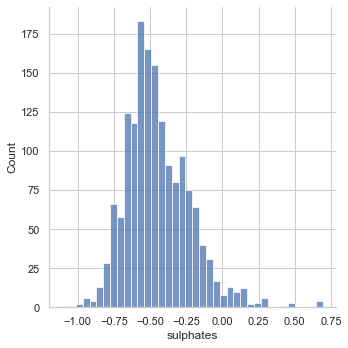

In [11]:
sns.displot(df['sulphates']);

In [10]:
df['sulphates']=np.log(df['sulphates'])

In [ ]:
ax = sns.violinplot(x="quality", y="sulphates", hue="quality",
                    data=df, palette='deep');

In [ ]:
sns.boxplot(x="quality", y="alcohol",palette='muted',
            data=df)
sns.despine(offset=10, trim=True);

# replace columns with transformations as needed 

In [12]:
df_reduced=df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'],axis=1)

In [13]:
df_reduced.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,2.397895,-0.579818,9.4,5
1,7.8,0.00,2.6,3.218876,-0.385662,9.8,5
2,7.8,0.04,2.3,2.708050,-0.430783,9.8,5
3,11.2,0.56,1.9,2.833213,-0.544727,9.8,6
4,7.4,0.00,1.9,2.397895,-0.579818,9.4,5


# Change quality label to object, check it and set as y 

In [ ]:
#df_reduced['quality']=df_reduced['quality'].astype(object) # this is not necessary and causes and error with sklearn

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
y=df['quality']
X=df.drop(['quality'],axis=1)

In [16]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Scale all of X 

In [17]:
# set scaler 
scaler=MinMaxScaler()

In [18]:
X_scaled=scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.29350719,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.4012633 ,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.37622157,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.45564218,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.42522375,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.38469498,
        0.4       ]])

In [20]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
X_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.560693,0.098940,0.567548,0.606299,0.293507,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.752660,0.215548,0.494126,0.362205,0.401263,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.633215,0.169611,0.508811,0.409449,0.376222,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.662482,0.190813,0.582232,0.330709,0.312983,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.560693,0.098940,0.567548,0.606299,0.293507,0.153846


In [22]:
X_scaled_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.595354,0.142996,0.490211,0.449695,0.368187,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.160240,0.116238,0.138571,0.121564,0.124079,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.455006,0.056537,0.406021,0.370079,0.283507,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.617083,0.113074,0.490455,0.448819,0.349996,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.711892,0.197880,0.570117,0.519685,0.440641,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test split 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.30,random_state=40)

# set up and apply the model 

In [24]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
y_train.value_counts()

5    482
6    445
7    138
4     39
8     10
3      5
Name: quality, dtype: int64

In [26]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred=Knn.predict(X_test)

In [28]:
y_pred

array([6, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 7, 5, 6, 5, 6, 5,
       6, 5, 7, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 5, 6,
       7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 5, 6, 4, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 7, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 6, 5,
       6, 6, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 7, 5, 5, 5, 5, 4, 5, 7, 7, 6, 6, 6, 5, 6, 6, 7, 7,
       6, 6, 6, 5, 7, 7, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 5, 4, 5, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 7, 6, 6, 6, 6, 6, 5, 4, 5, 5, 5, 5, 7,

In [29]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[  0,   2,   2,   1,   0,   0],
       [  0,   0,  12,   2,   0,   0],
       [  0,   6, 140,  50,   3,   0],
       [  0,   1,  52, 119,  21,   0],
       [  0,   0,   9,  26,  26,   0],
       [  0,   0,   1,   4,   3,   0]])

In [ ]:
y_test.value_counts()

In [ ]:
y_train.value_counts()

In [30]:
accuracy_score(y_test,y_pred)

0.59375

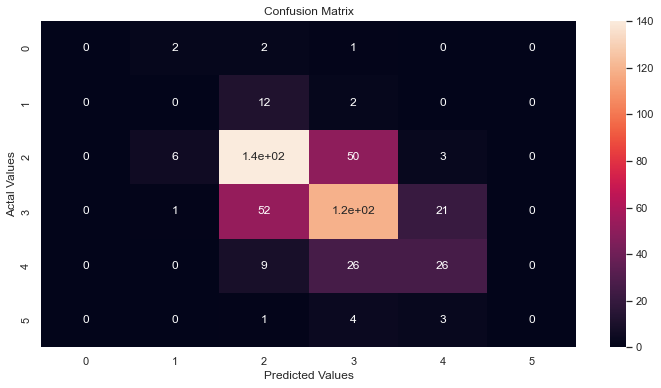

In [31]:
sns.heatmap(c_m, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();

# Find correct k 

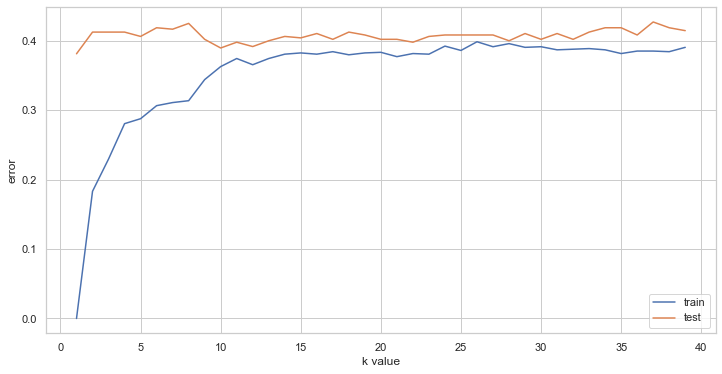

In [33]:
error_train=[]
error_test=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1)) # or append accuracy_score(y_test,y_pred)
    y_pred2=knn.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,40),error_train,label='train')
plt.plot(range(1,40),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

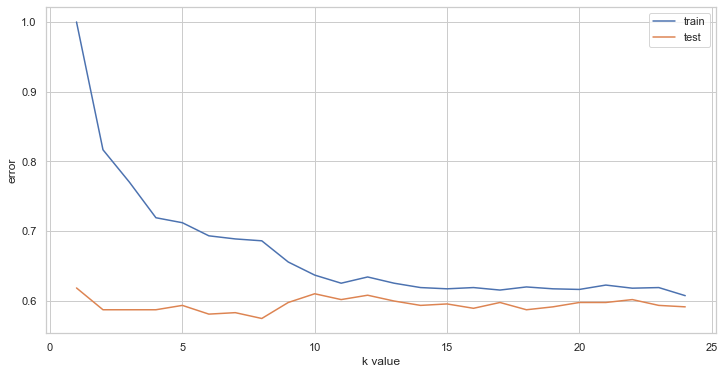

In [34]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(accuracy_score(y_train,y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(accuracy_score(y_test,y_pred2))
plt.plot(range(1,25),error_train,label='train')
plt.plot(range(1,25),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

# Activity

In [35]:
data = df[['alcohol','sulphates','quality']]

In [36]:
data_sample=data.sample(n=100, random_state=40, replace=False)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [38]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show();

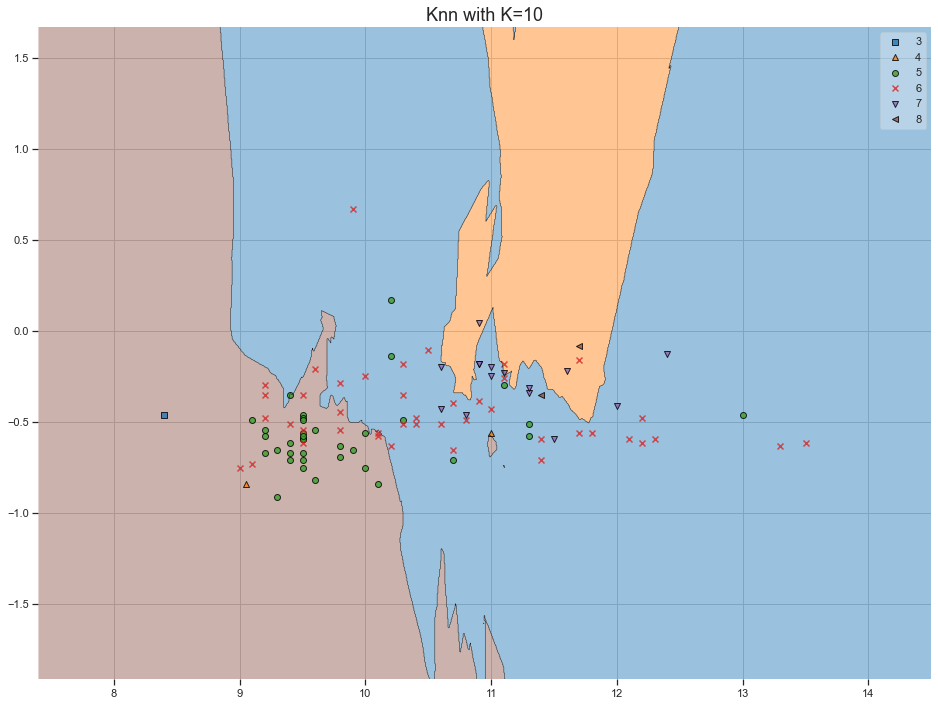

In [39]:
knn_comparison(data_sample, 10);